In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import re
import nltk
from nltk.stem import WordNetLemmatizer 

In [2]:
#Tokenizing,stemming and lemitization 
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords #Importing the stopwords to remove the stepwords using nltk stopwords library
from nltk.stem.porter import PorterStemmer #Using porterstemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shikharghimire/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shikharghimire/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shikharghimire/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
#Importing both the real and fake data
##Quoting = 3 ignores double quotes in reviews as it is not necessary  or helpful to distinguish
true_data = pd.read_csv('true.csv')
fake_data = pd.read_csv('fake.csv')

In [4]:
#First let's add a coloumn called 'True' in the true data and 'False' in fake data
for i in range(len(true_data)):
    true_data['results'] = 'Real'
for i in range(len(fake_data)):
    fake_data['results'] = 'Fake'

In [5]:
#Let's count and plot the subject of the text category
true_subject = true_data['subject'].value_counts()
fake_subject = fake_data['subject'].value_counts()
print(fake_subject)
print('-------*-------')
print(true_subject)
#Looks like there are more subjects on the fake news and less content on the true news

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64
-------*-------
politicsNews    11272
worldnews       10145
Name: subject, dtype: int64


In [6]:
true_data.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date results  
0  December 31, 2017     Real  
1  December 29, 2017     Real  
2  December 31, 2017     Real  
3  December 30, 2017     Real  
4  December 29, 2017     Real

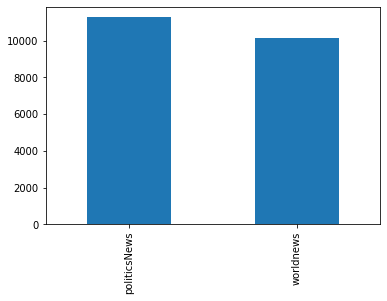

In [7]:
#Plotting the data out
true_subject.plot(kind = 'bar')

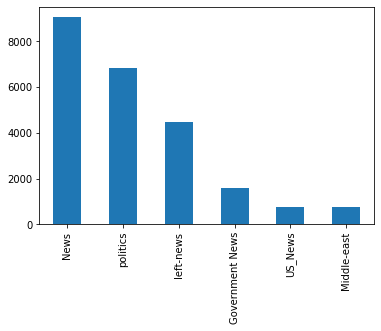

In [8]:
fake_subject.plot(kind = 'bar')

In [9]:
#Joining dtext and title in one column to create the news article
true_data['News'] = true_data['title'] + ' ' + true_data['text']
fake_data['News'] = fake_data['title'] + ' '+ true_data['text']

In [10]:
#Deleting title and text from both dataframe
del true_data['title']
del true_data['text']
del fake_data['title']
del fake_data['text']
del true_data['date']
del fake_data['date']

In [11]:
#Let's check the number of categories in subject coloumn for true news
true_data['subject'].value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

In [12]:
#Let's check the number of categories in subject coloumn for fake news
fake_data['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [13]:
#Further exploration of the data by seperating the subjects into new dataframe and check the wordcloud in it
#For true news
true_politics = true_data[true_data['subject'] =='politicsNews']
true_world = true_data[true_data['subject'] == 'worldnews']

In [14]:
#Further exploration of the data by seperating the subjects into new dataframe and check the wordcloud in it
#For fake news
fake_news = fake_data[fake_data['subject'] =='News']
fake_politics = fake_data[fake_data['subject'] == 'politics']
fake_leftNews = fake_data[fake_data['subject'] == 'left-news']
fake_govNews = fake_data[fake_data['subject'] == 'Government News']
fake_usNews = fake_data[fake_data['subject'] == 'US_News']
middle_east = fake_data[fake_data['subject'] == 'Middle-east']

In [15]:
ps = PorterStemmer()
lem = WordNetLemmatizer() 

def tokenize_stem_lemm(string):
    news = nltk.word_tokenize(string) #Creating a tokenizer
    news = [words.lower() for words in news] #Converting all the strings into lowercase
    news = [ps.stem(words) for words in news if not words in set(stopwords.words('english'))]
    news = [lem.lemmatize(words) for words in news]
    news = ' '.join(news) #Reversing it back to non list string as above method 'string' would have stringed 
    return news

In [16]:
true_politics['News'] = true_politics['News'].apply(tokenize_stem_lemm)

/Users/shikharghimire/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
true_world['News'] = true_world['News'].apply(tokenize_stem_lemm)

In [29]:
#Let's create a function for the wordcloud to see the mostly occured strings 
def word_cloud(string):
    wordcloud = WordCloud(
    width = 500,
    height = 500,
    background_color = 'black').generate(str(string))
    fig = plt.figure(
        figsize = (40, 30),
        facecolor = 'k',
        edgecolor = 'k')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

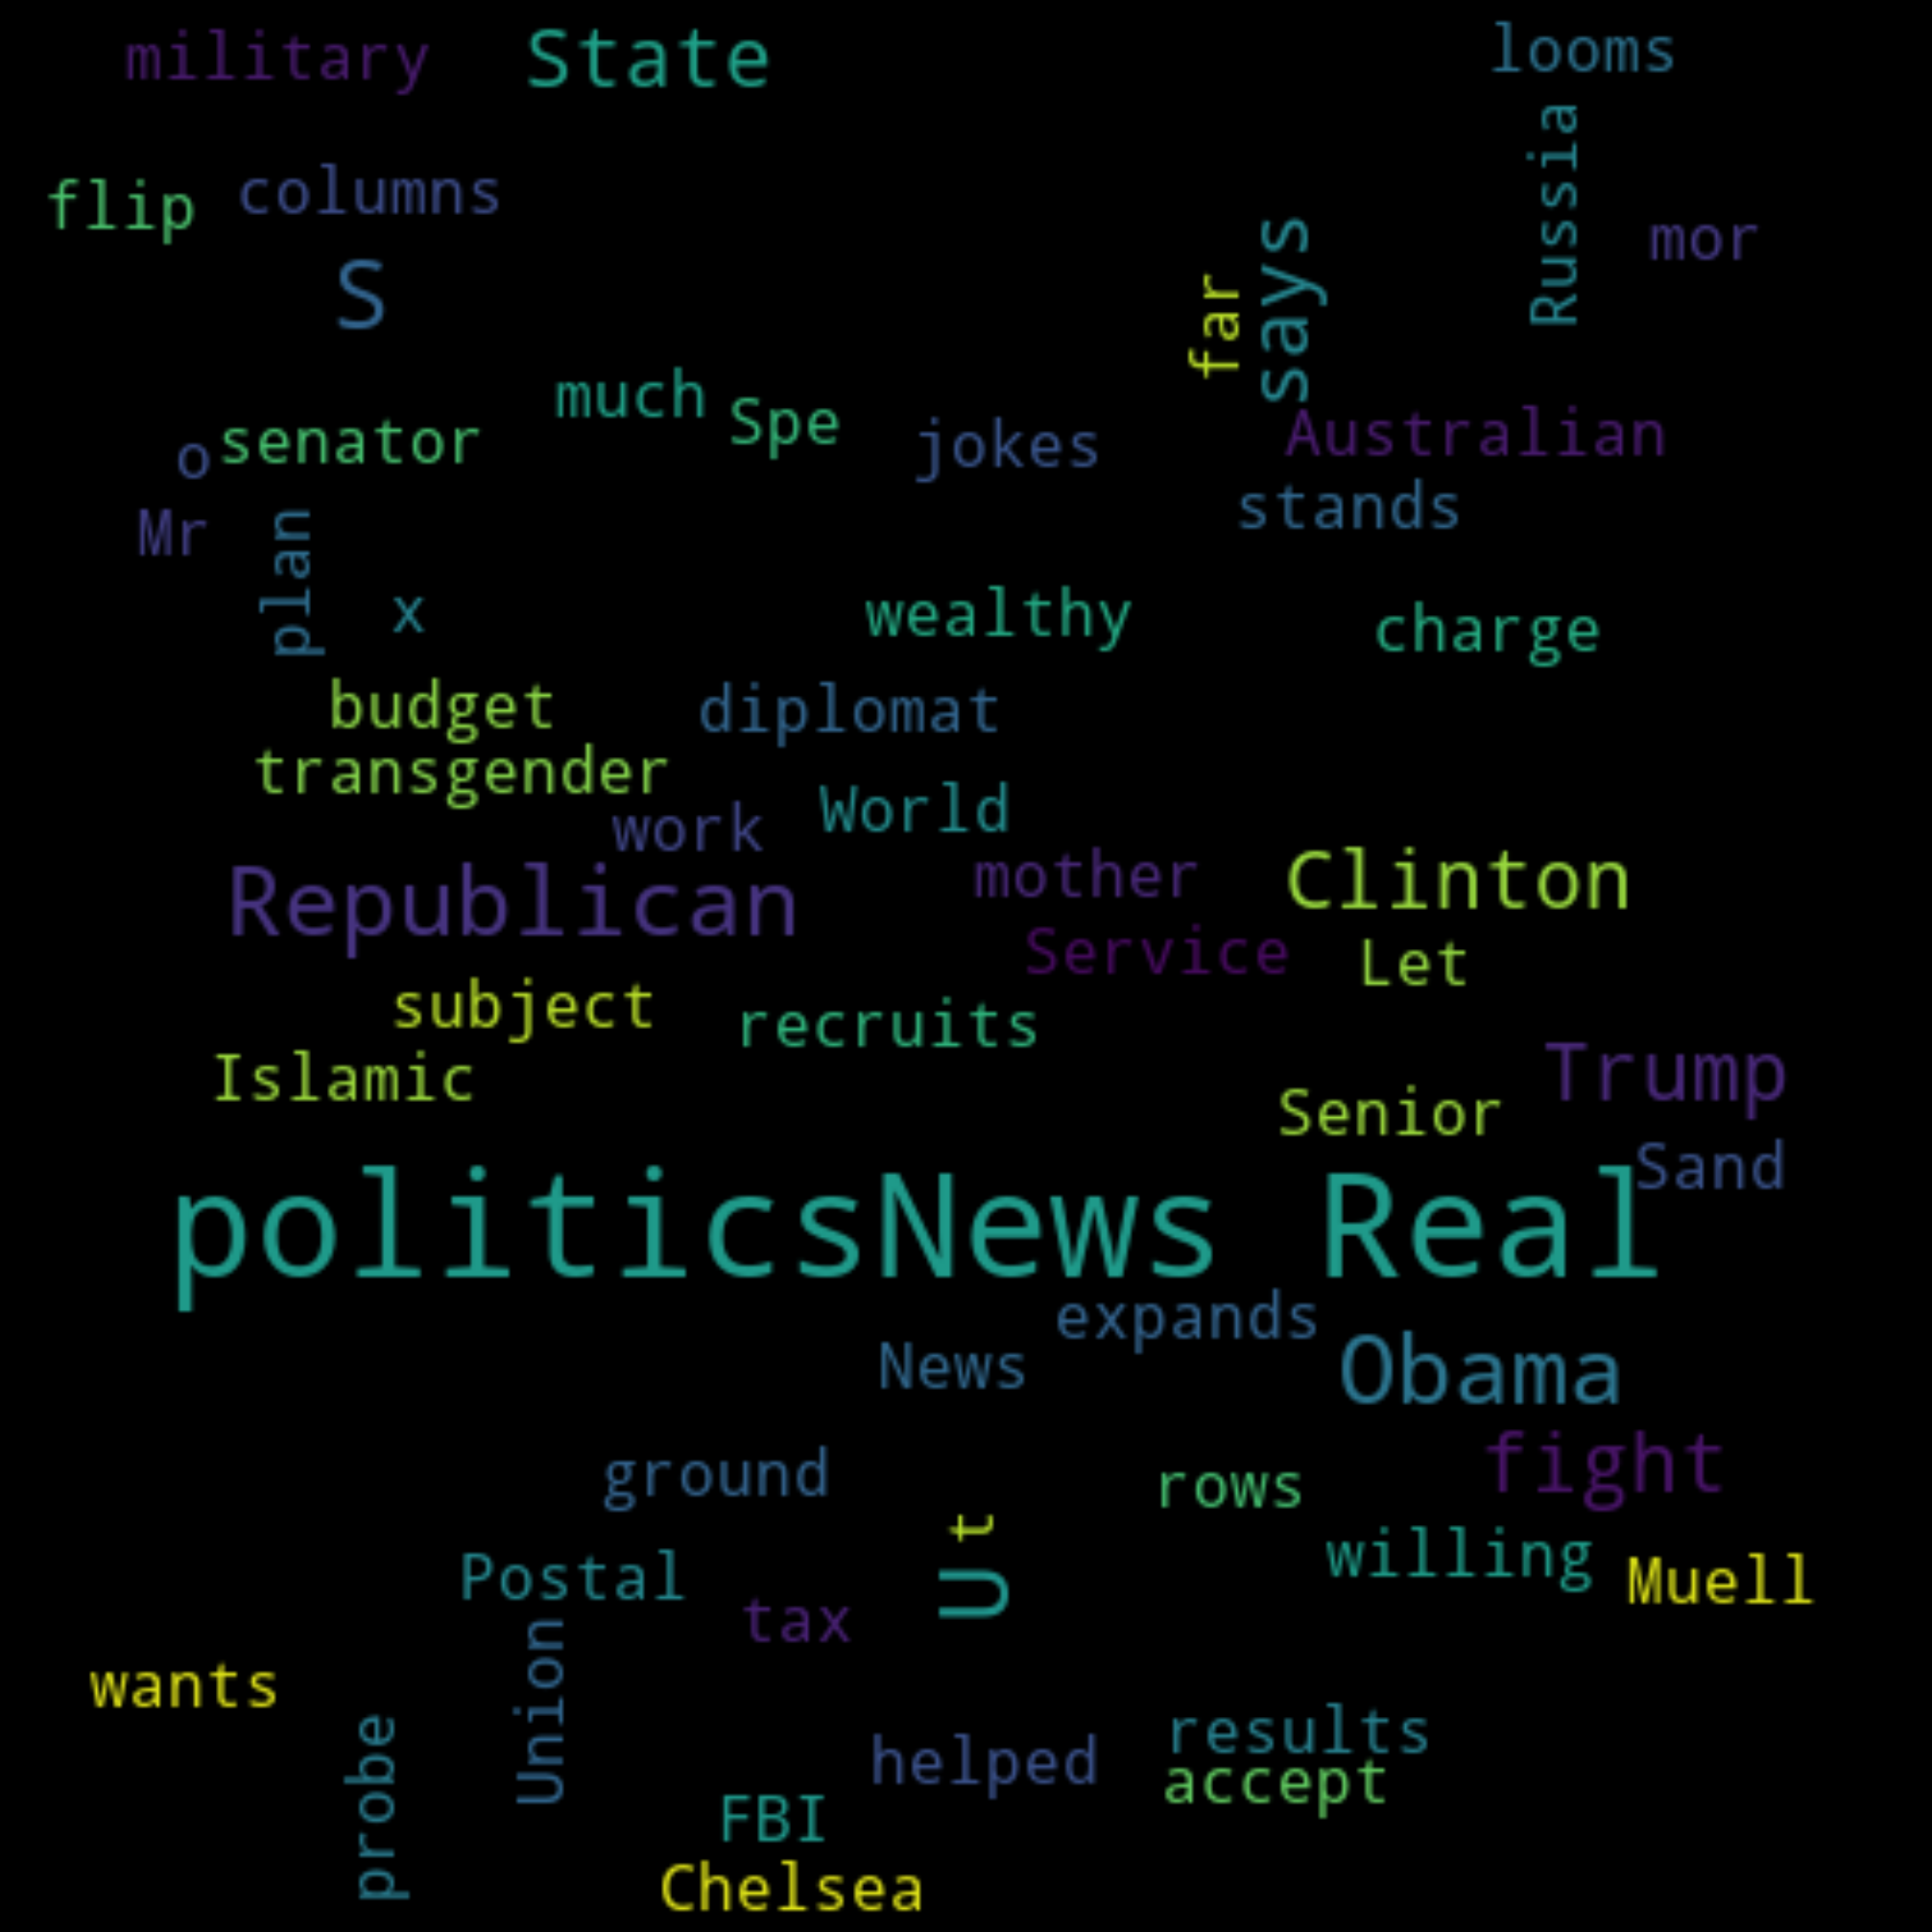

In [30]:
word_cloud(true_politics)

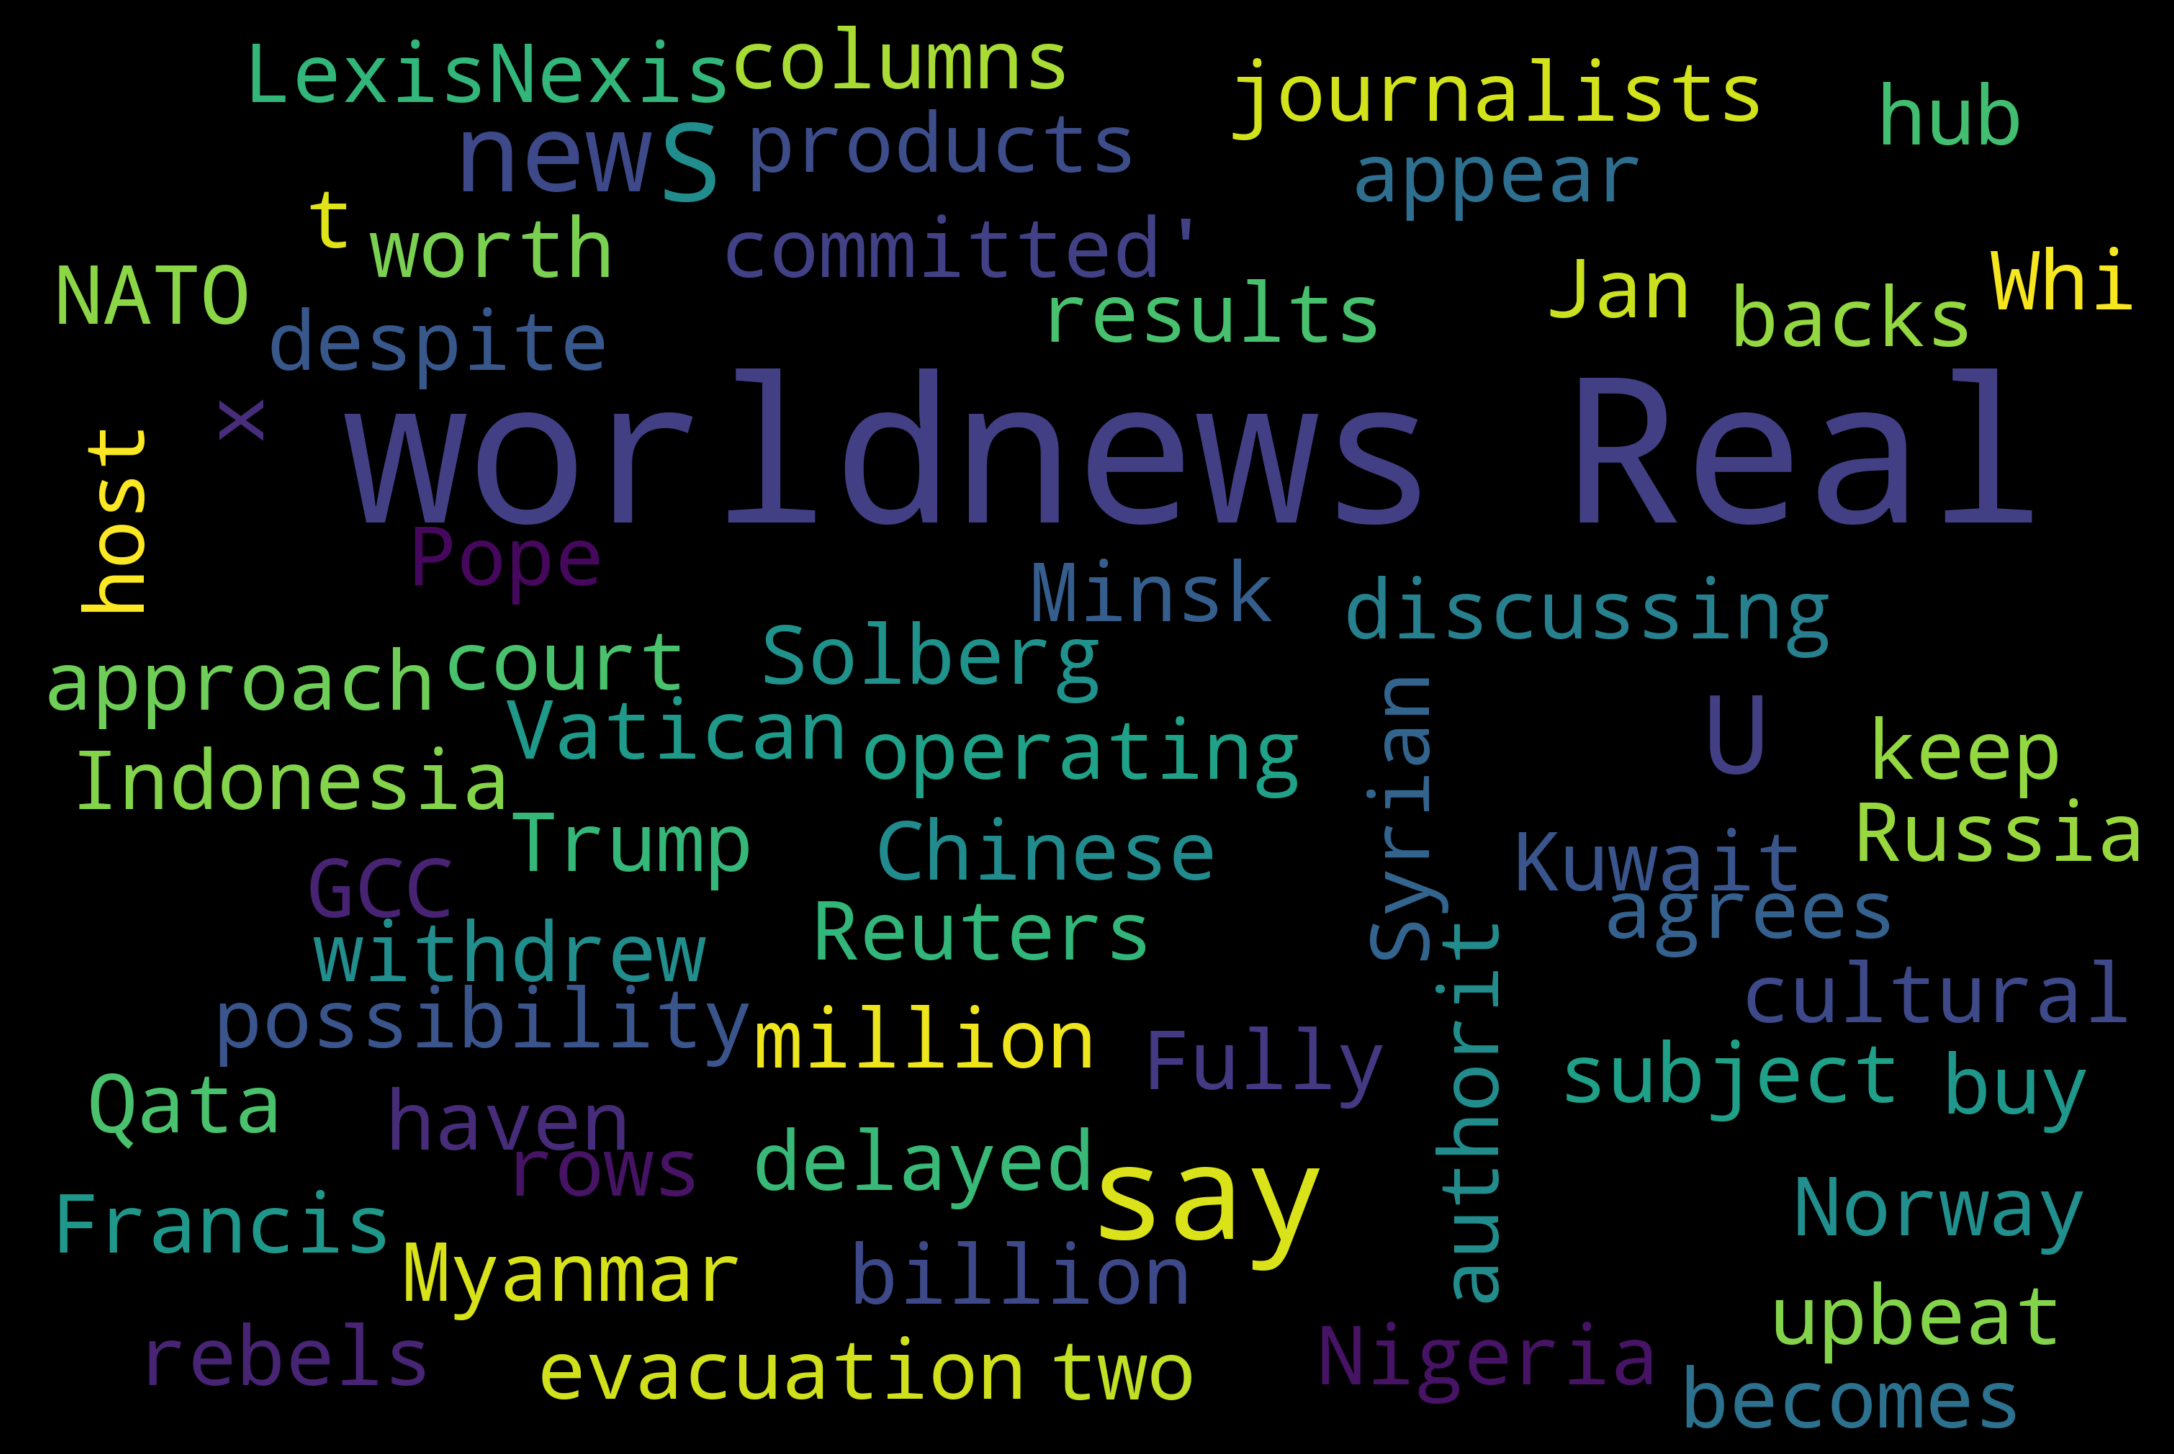

In [18]:
word_cloud(true_world)

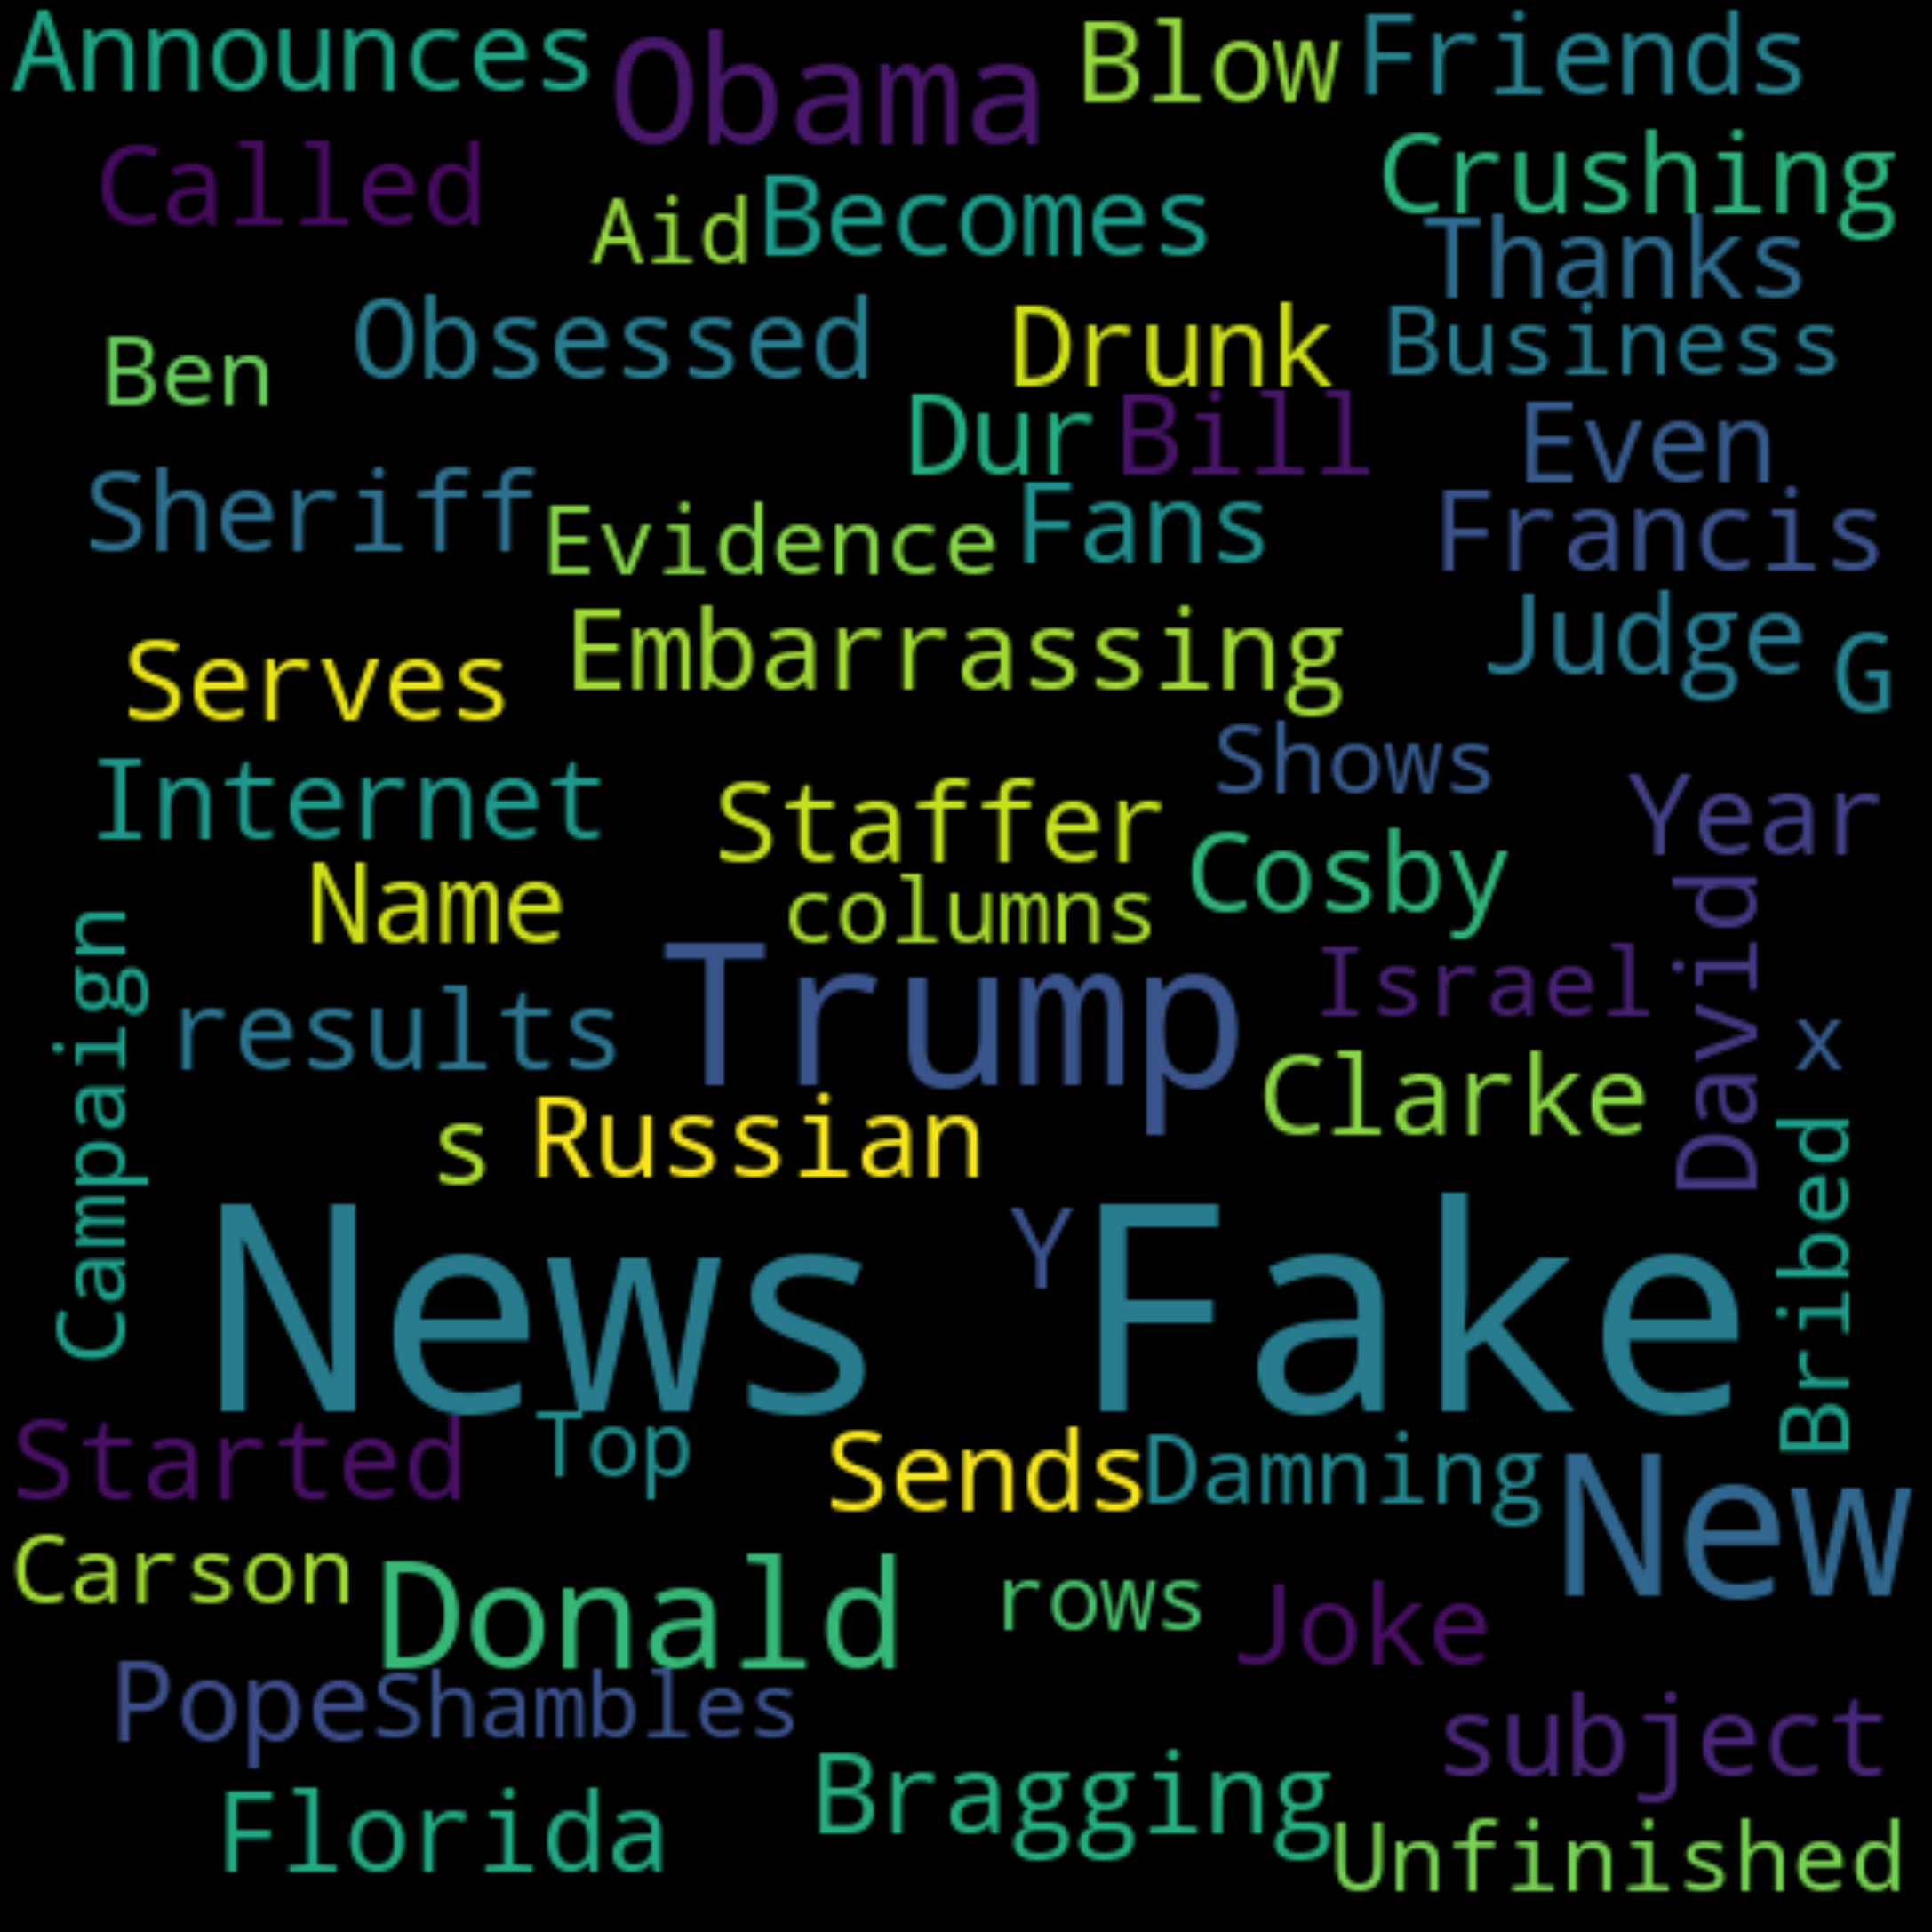

In [23]:
word_cloud(fake_news)

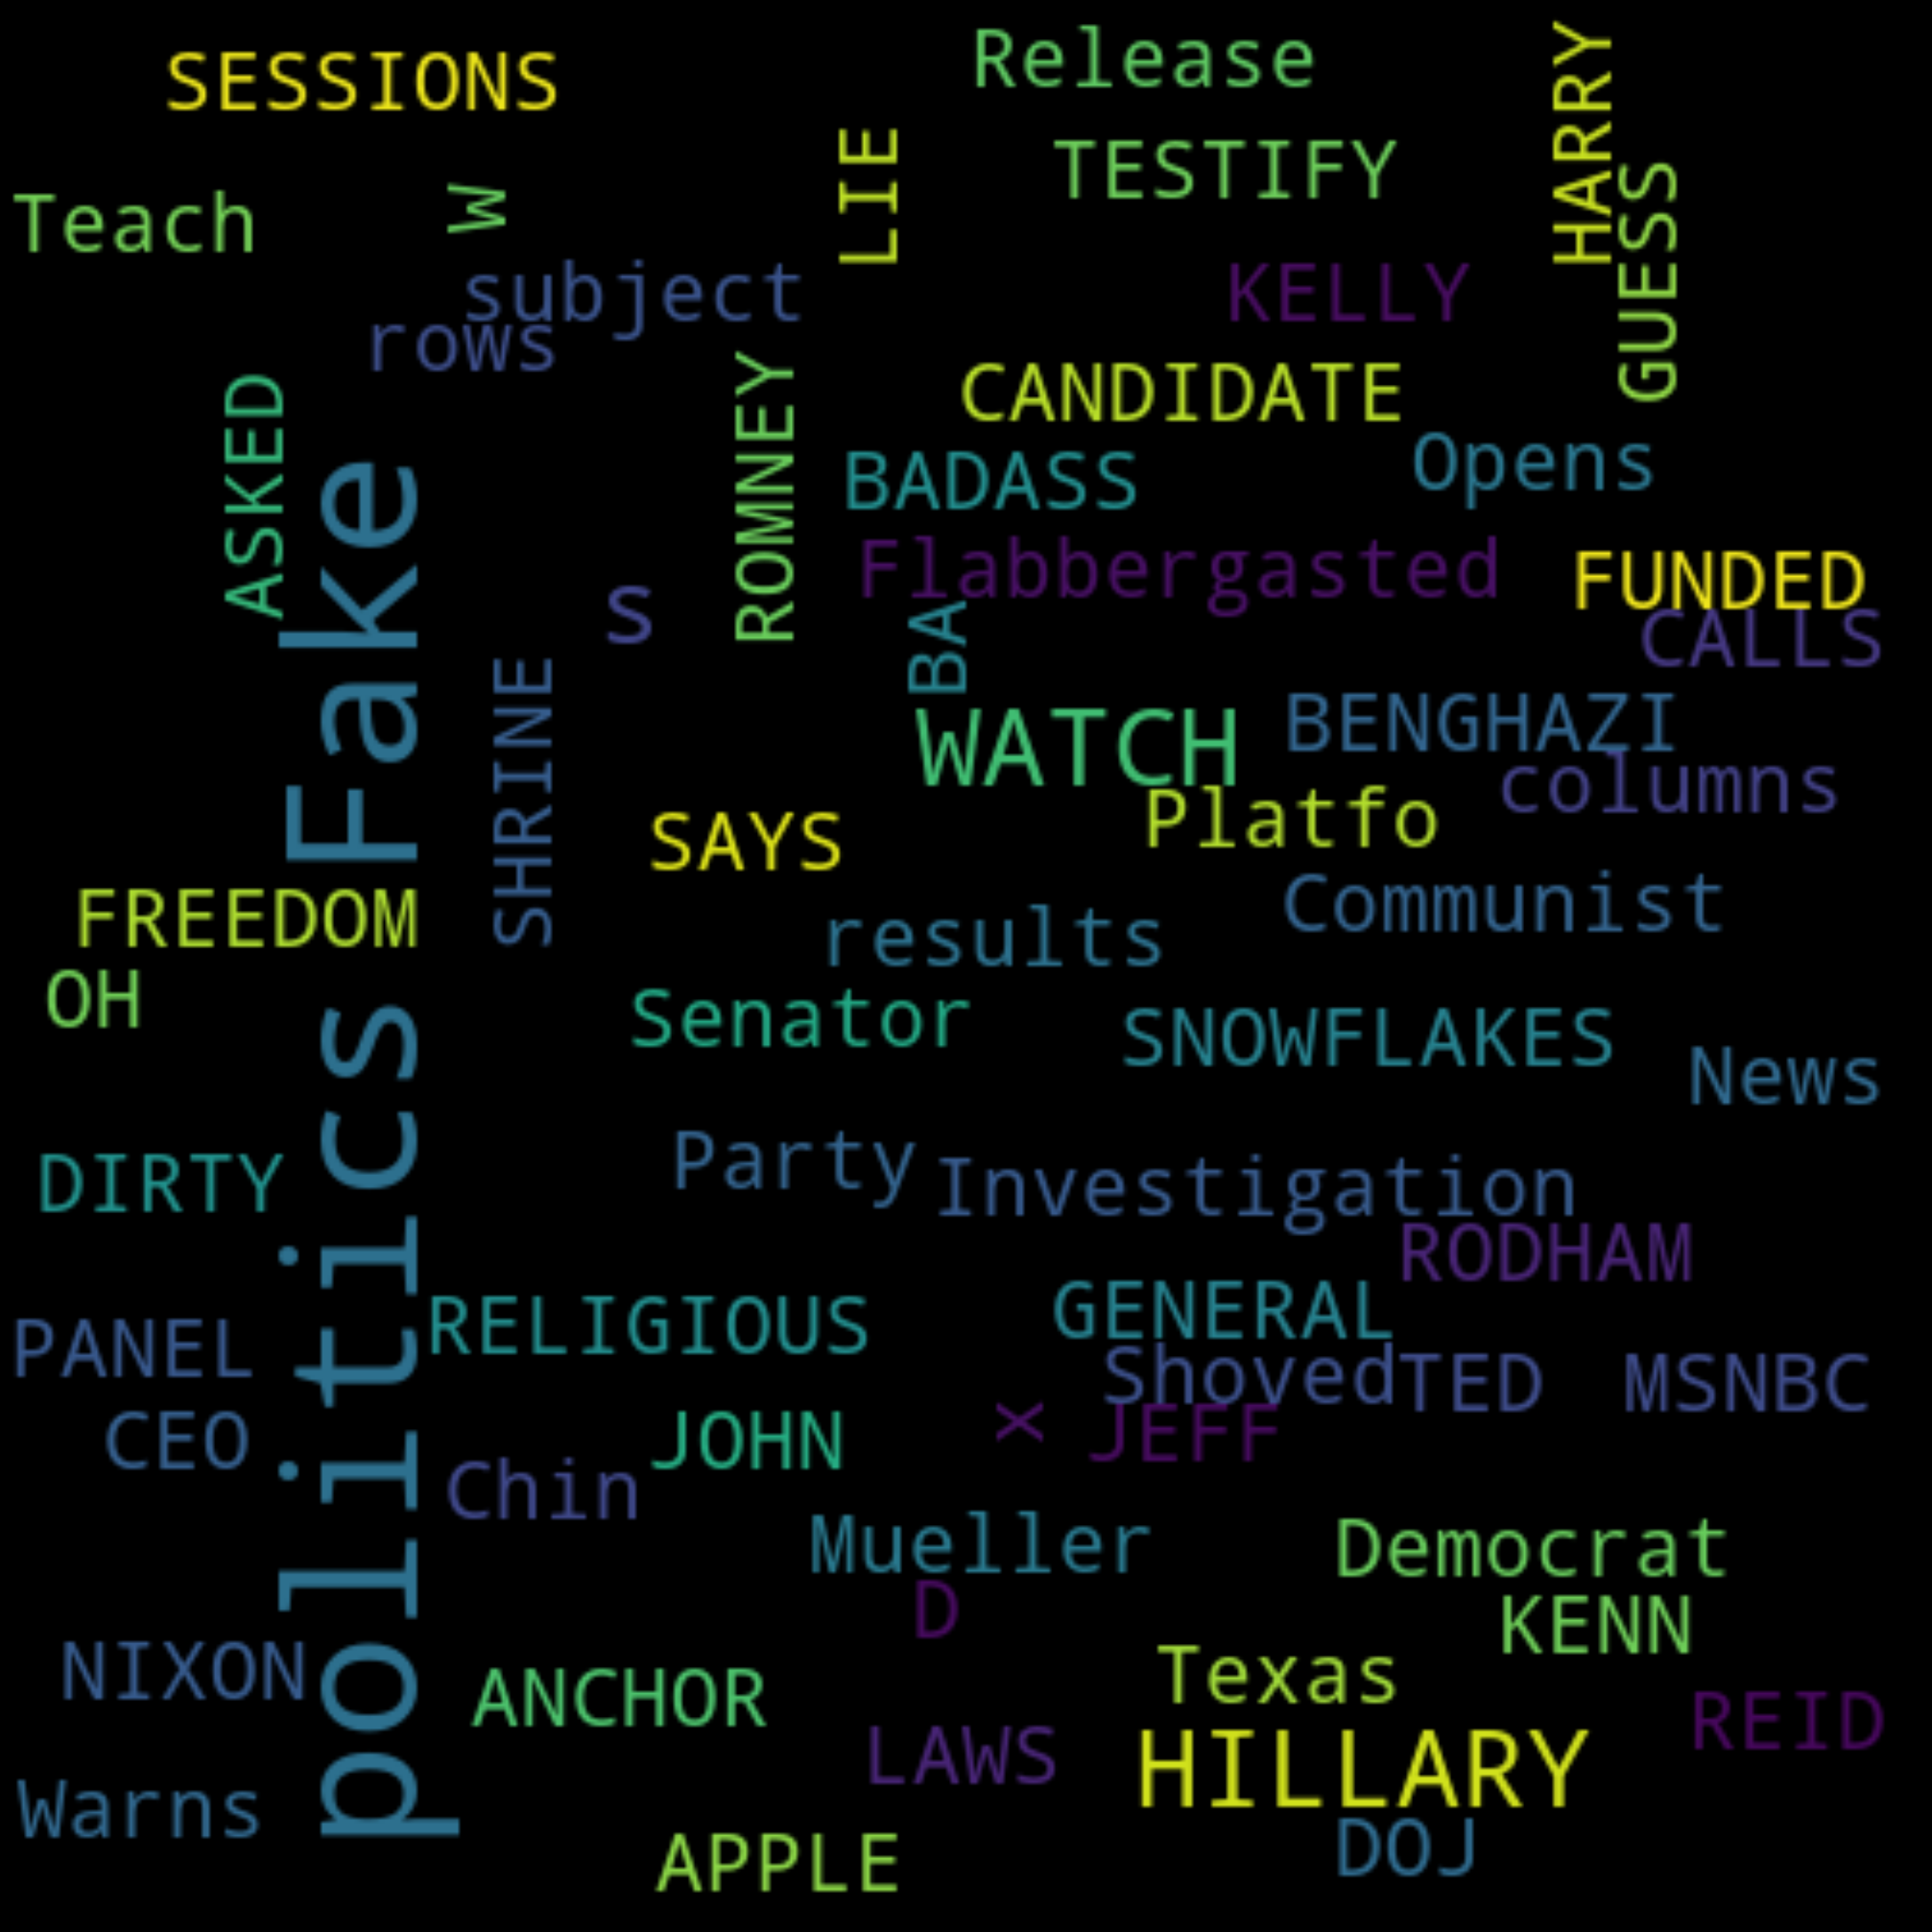

In [24]:
word_cloud(fake_politics)

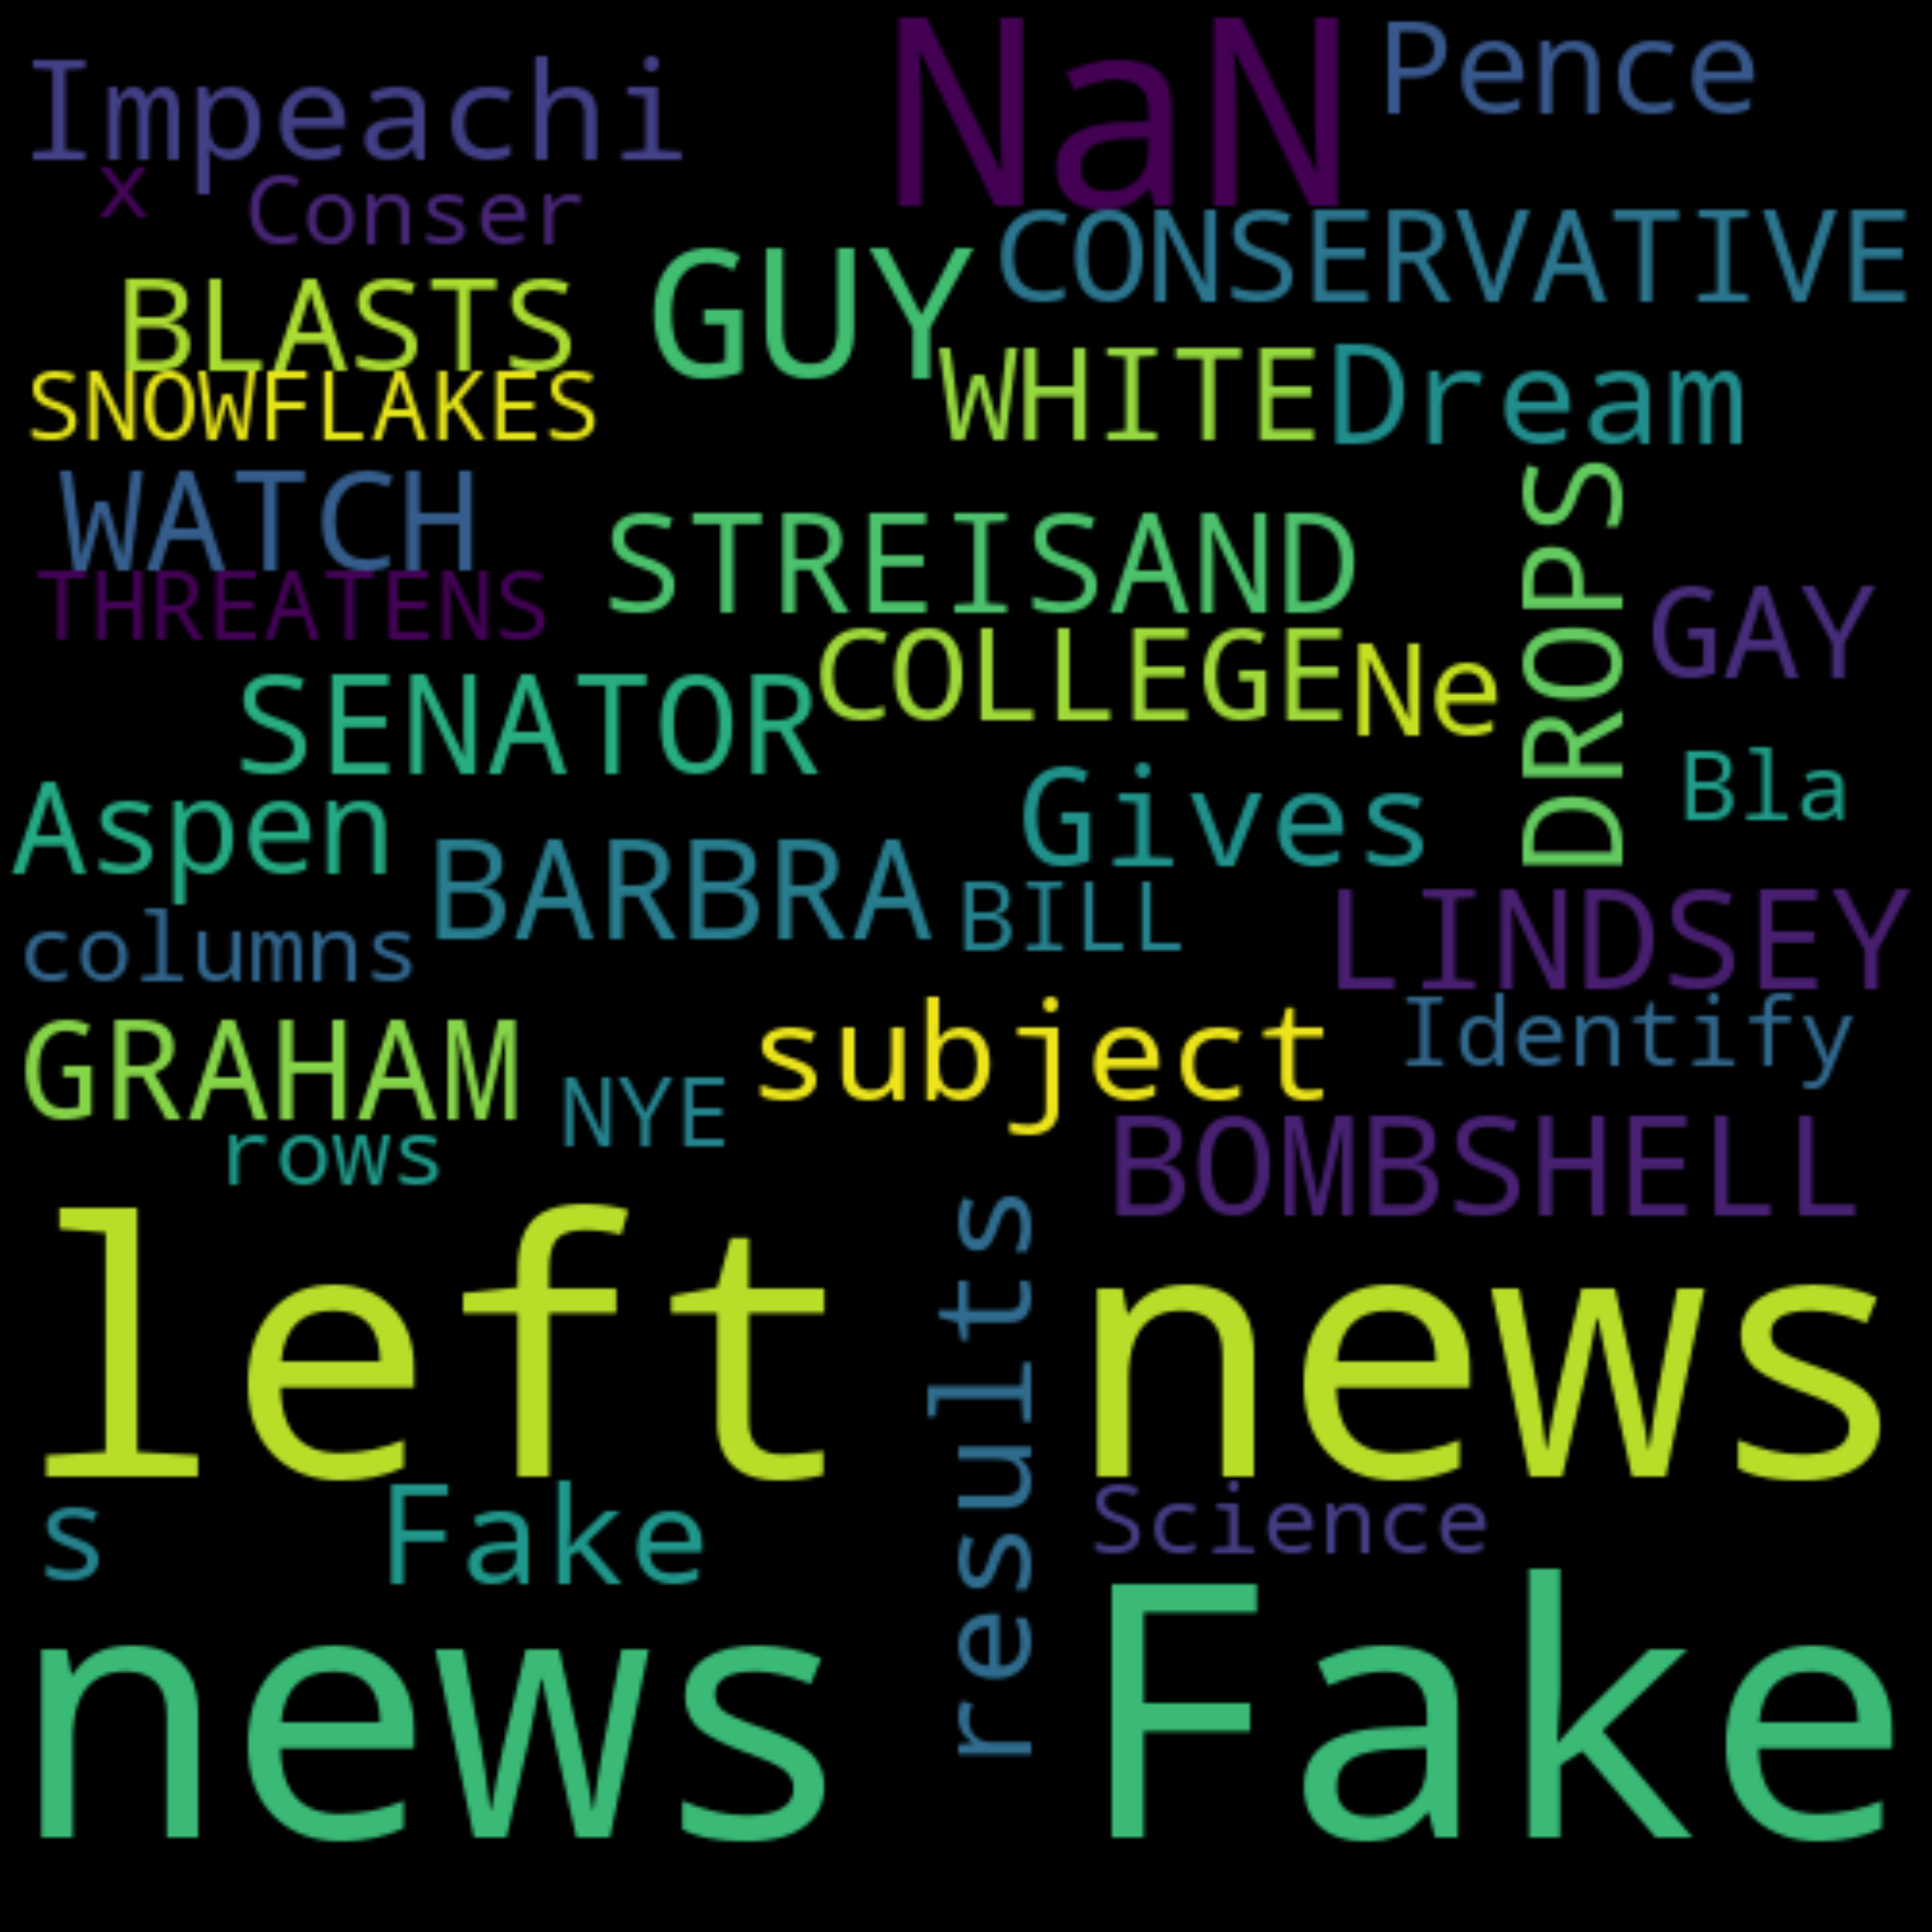

In [25]:
word_cloud(fake_leftNews)

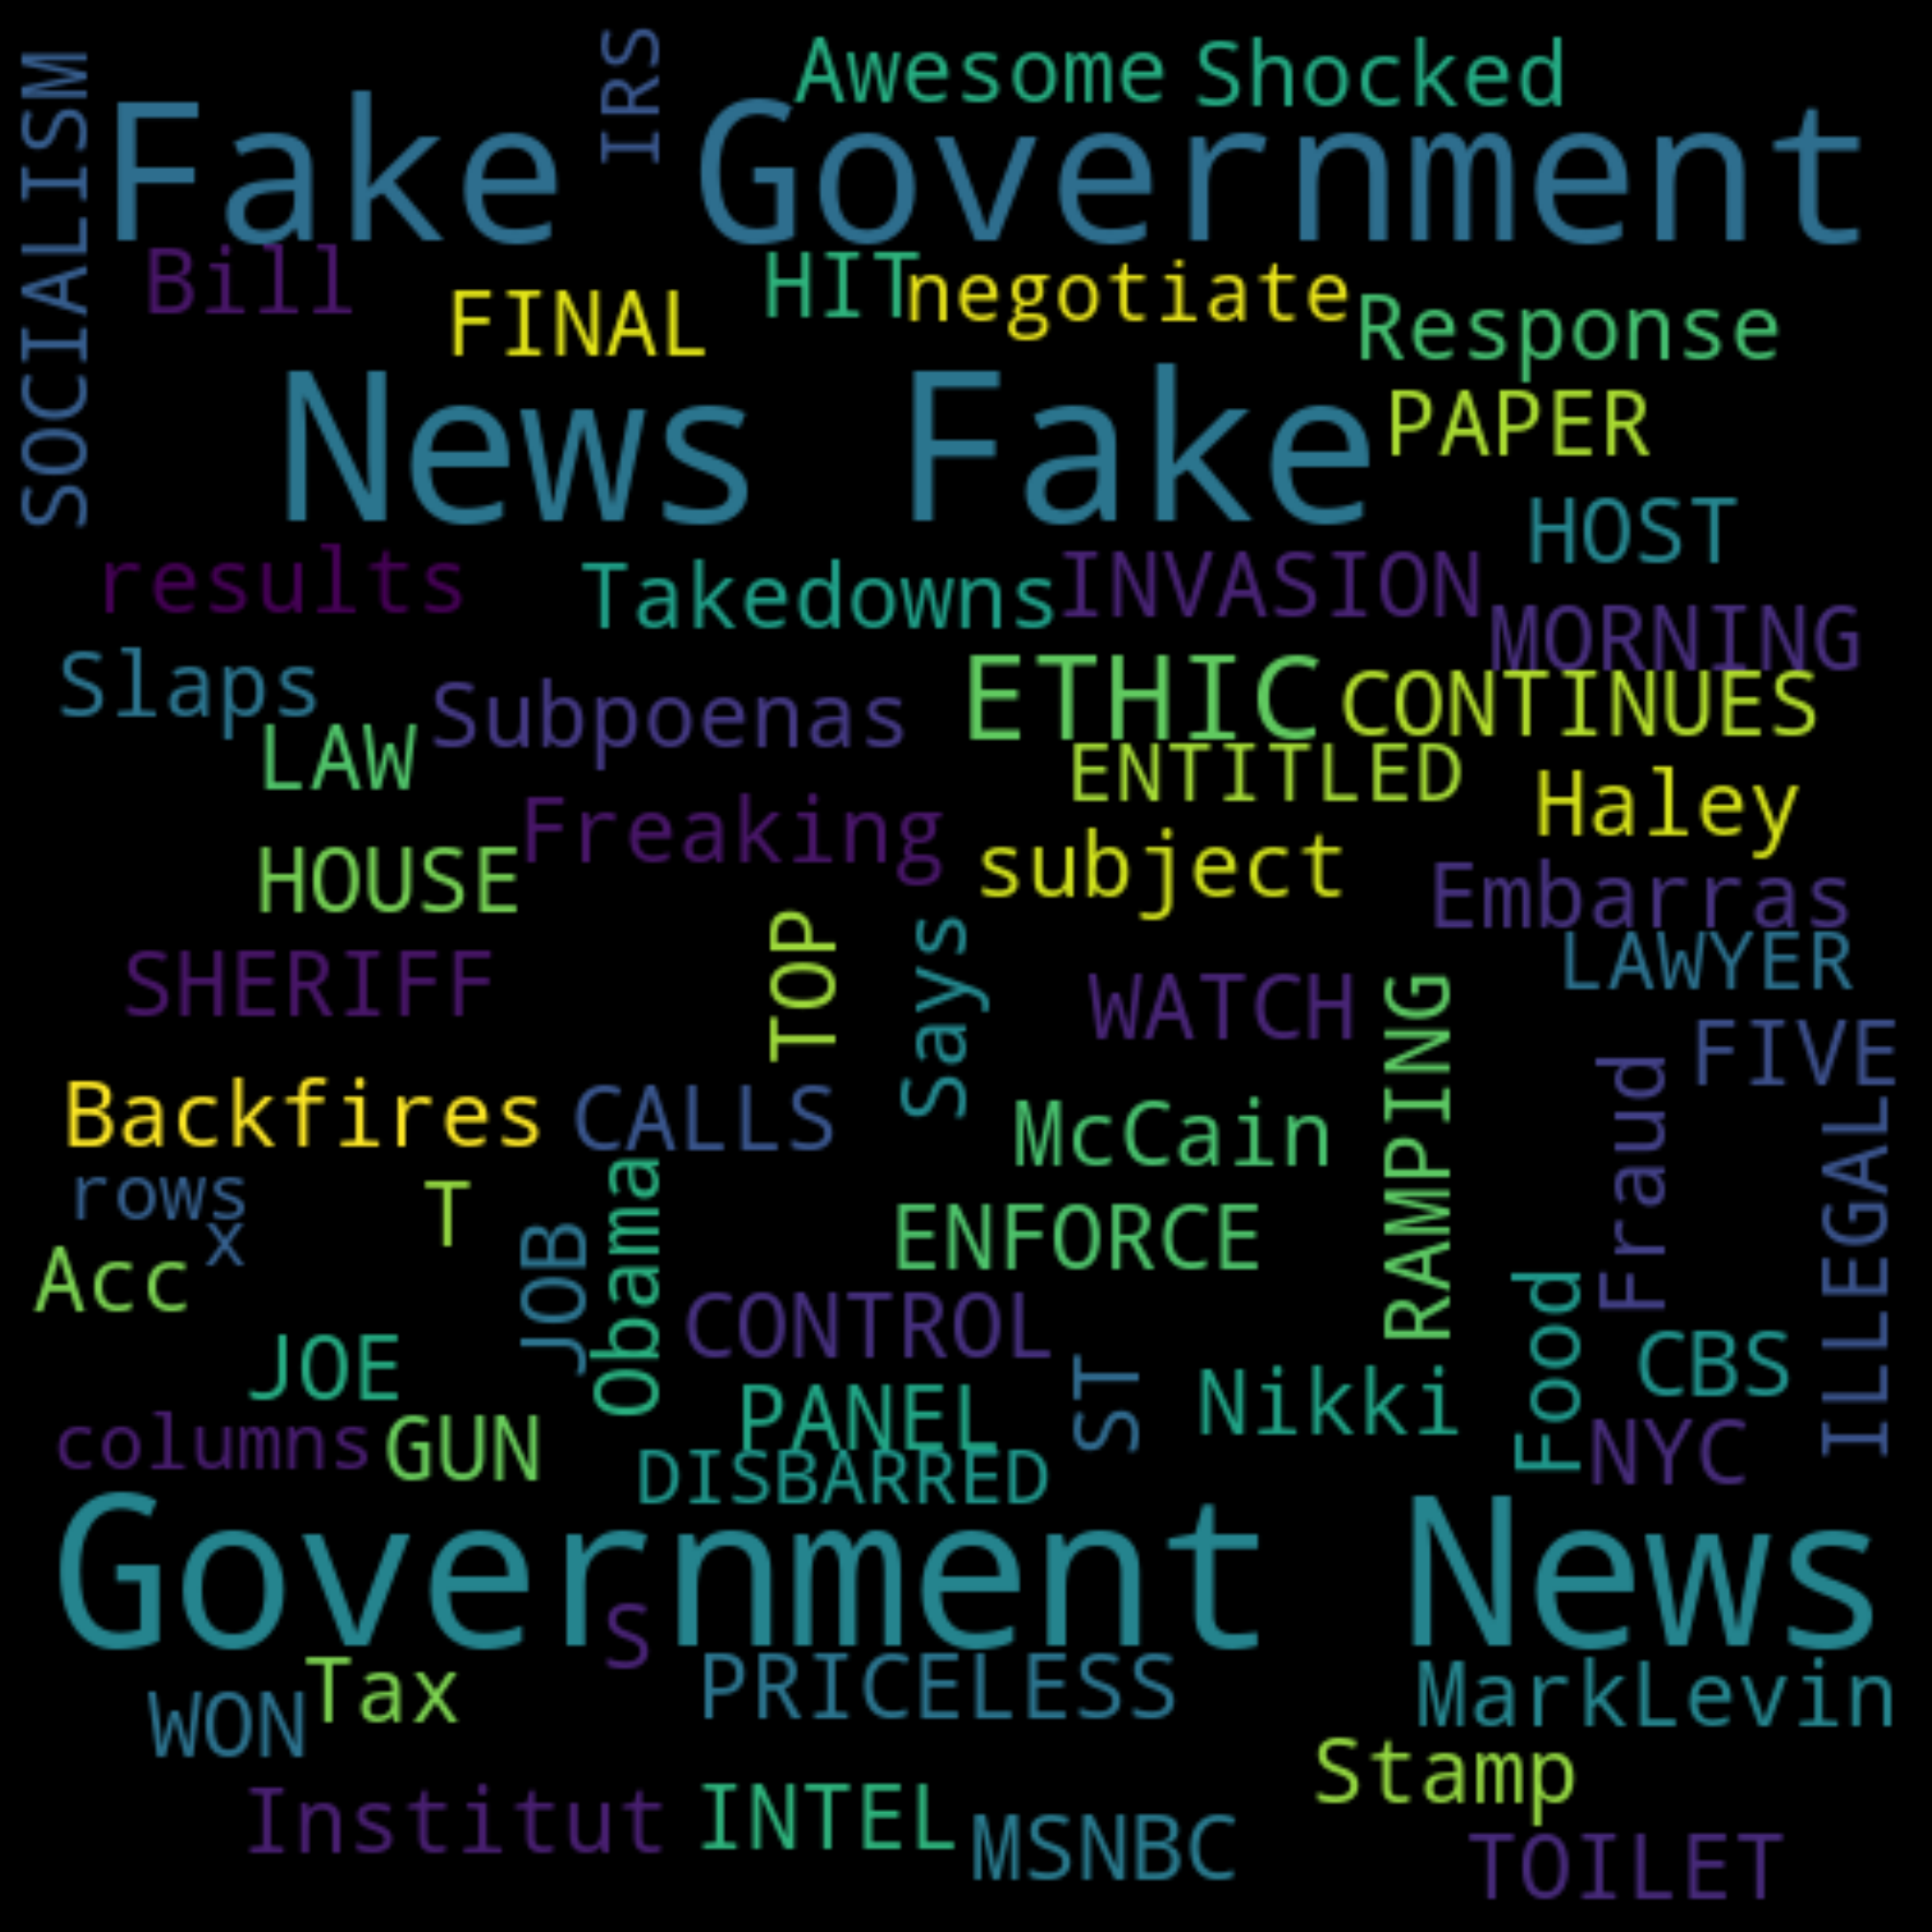

In [26]:
word_cloud(fake_govNews)

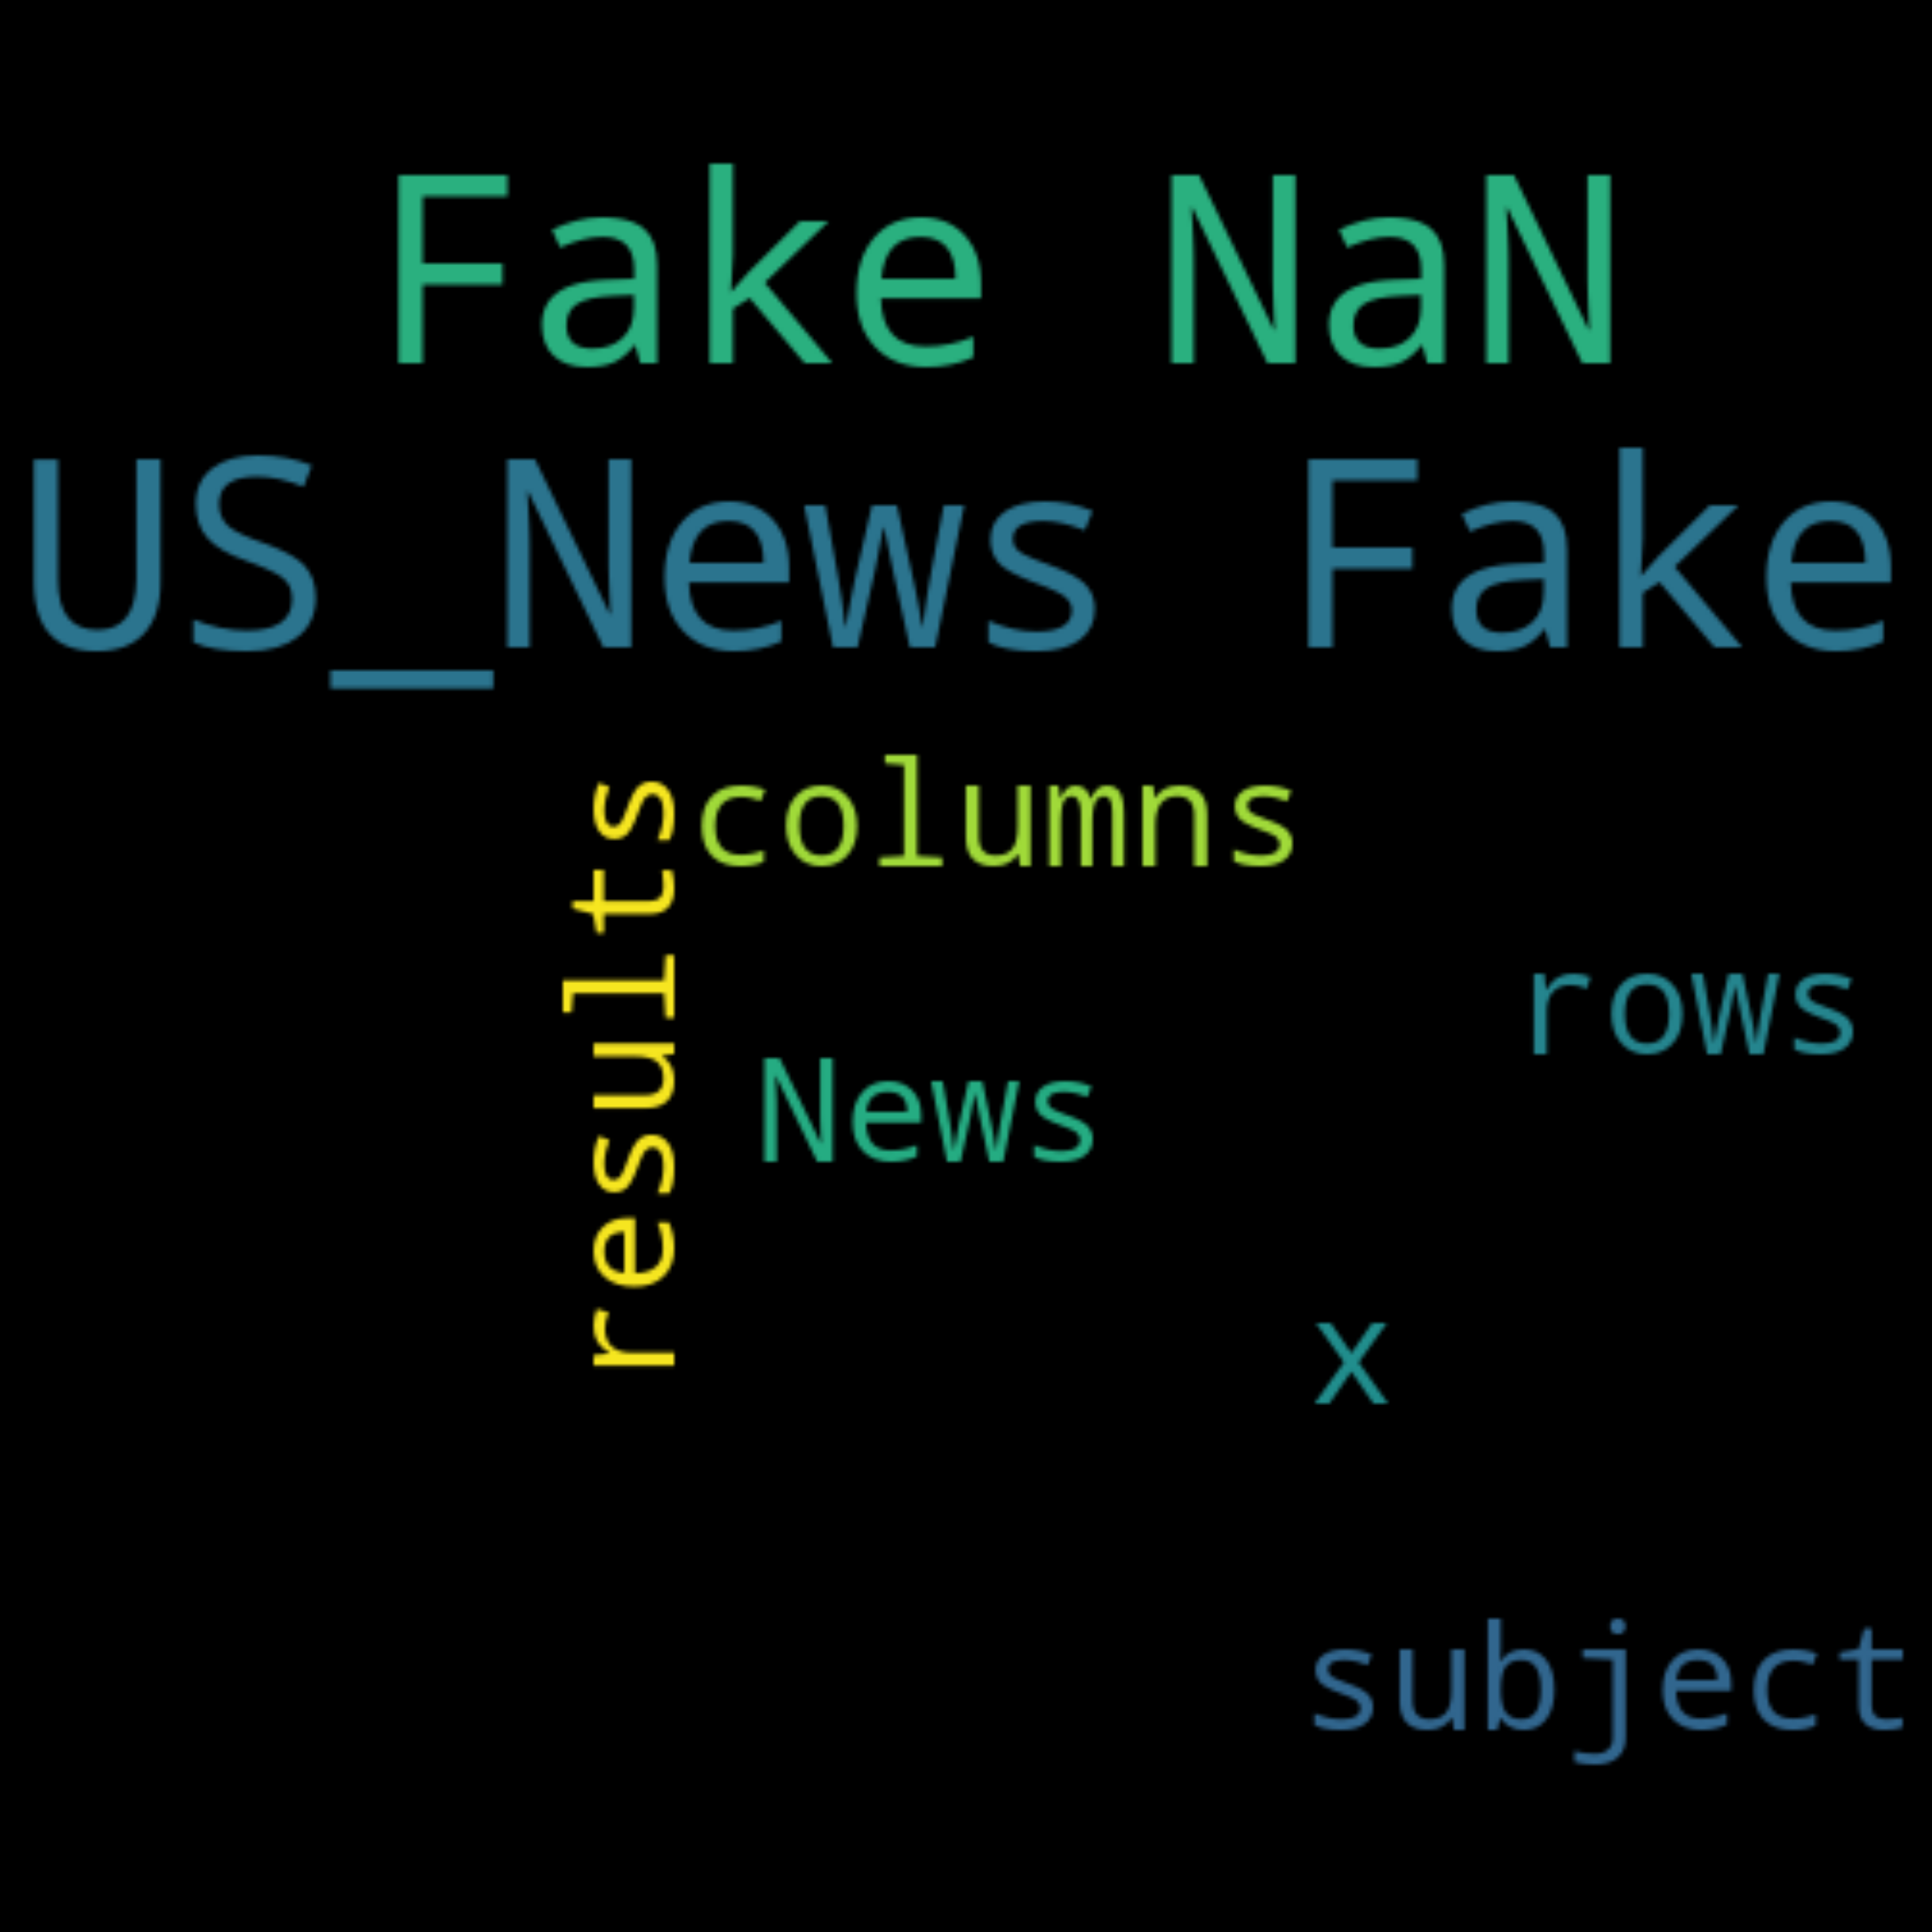

In [27]:
word_cloud(fake_usNews)

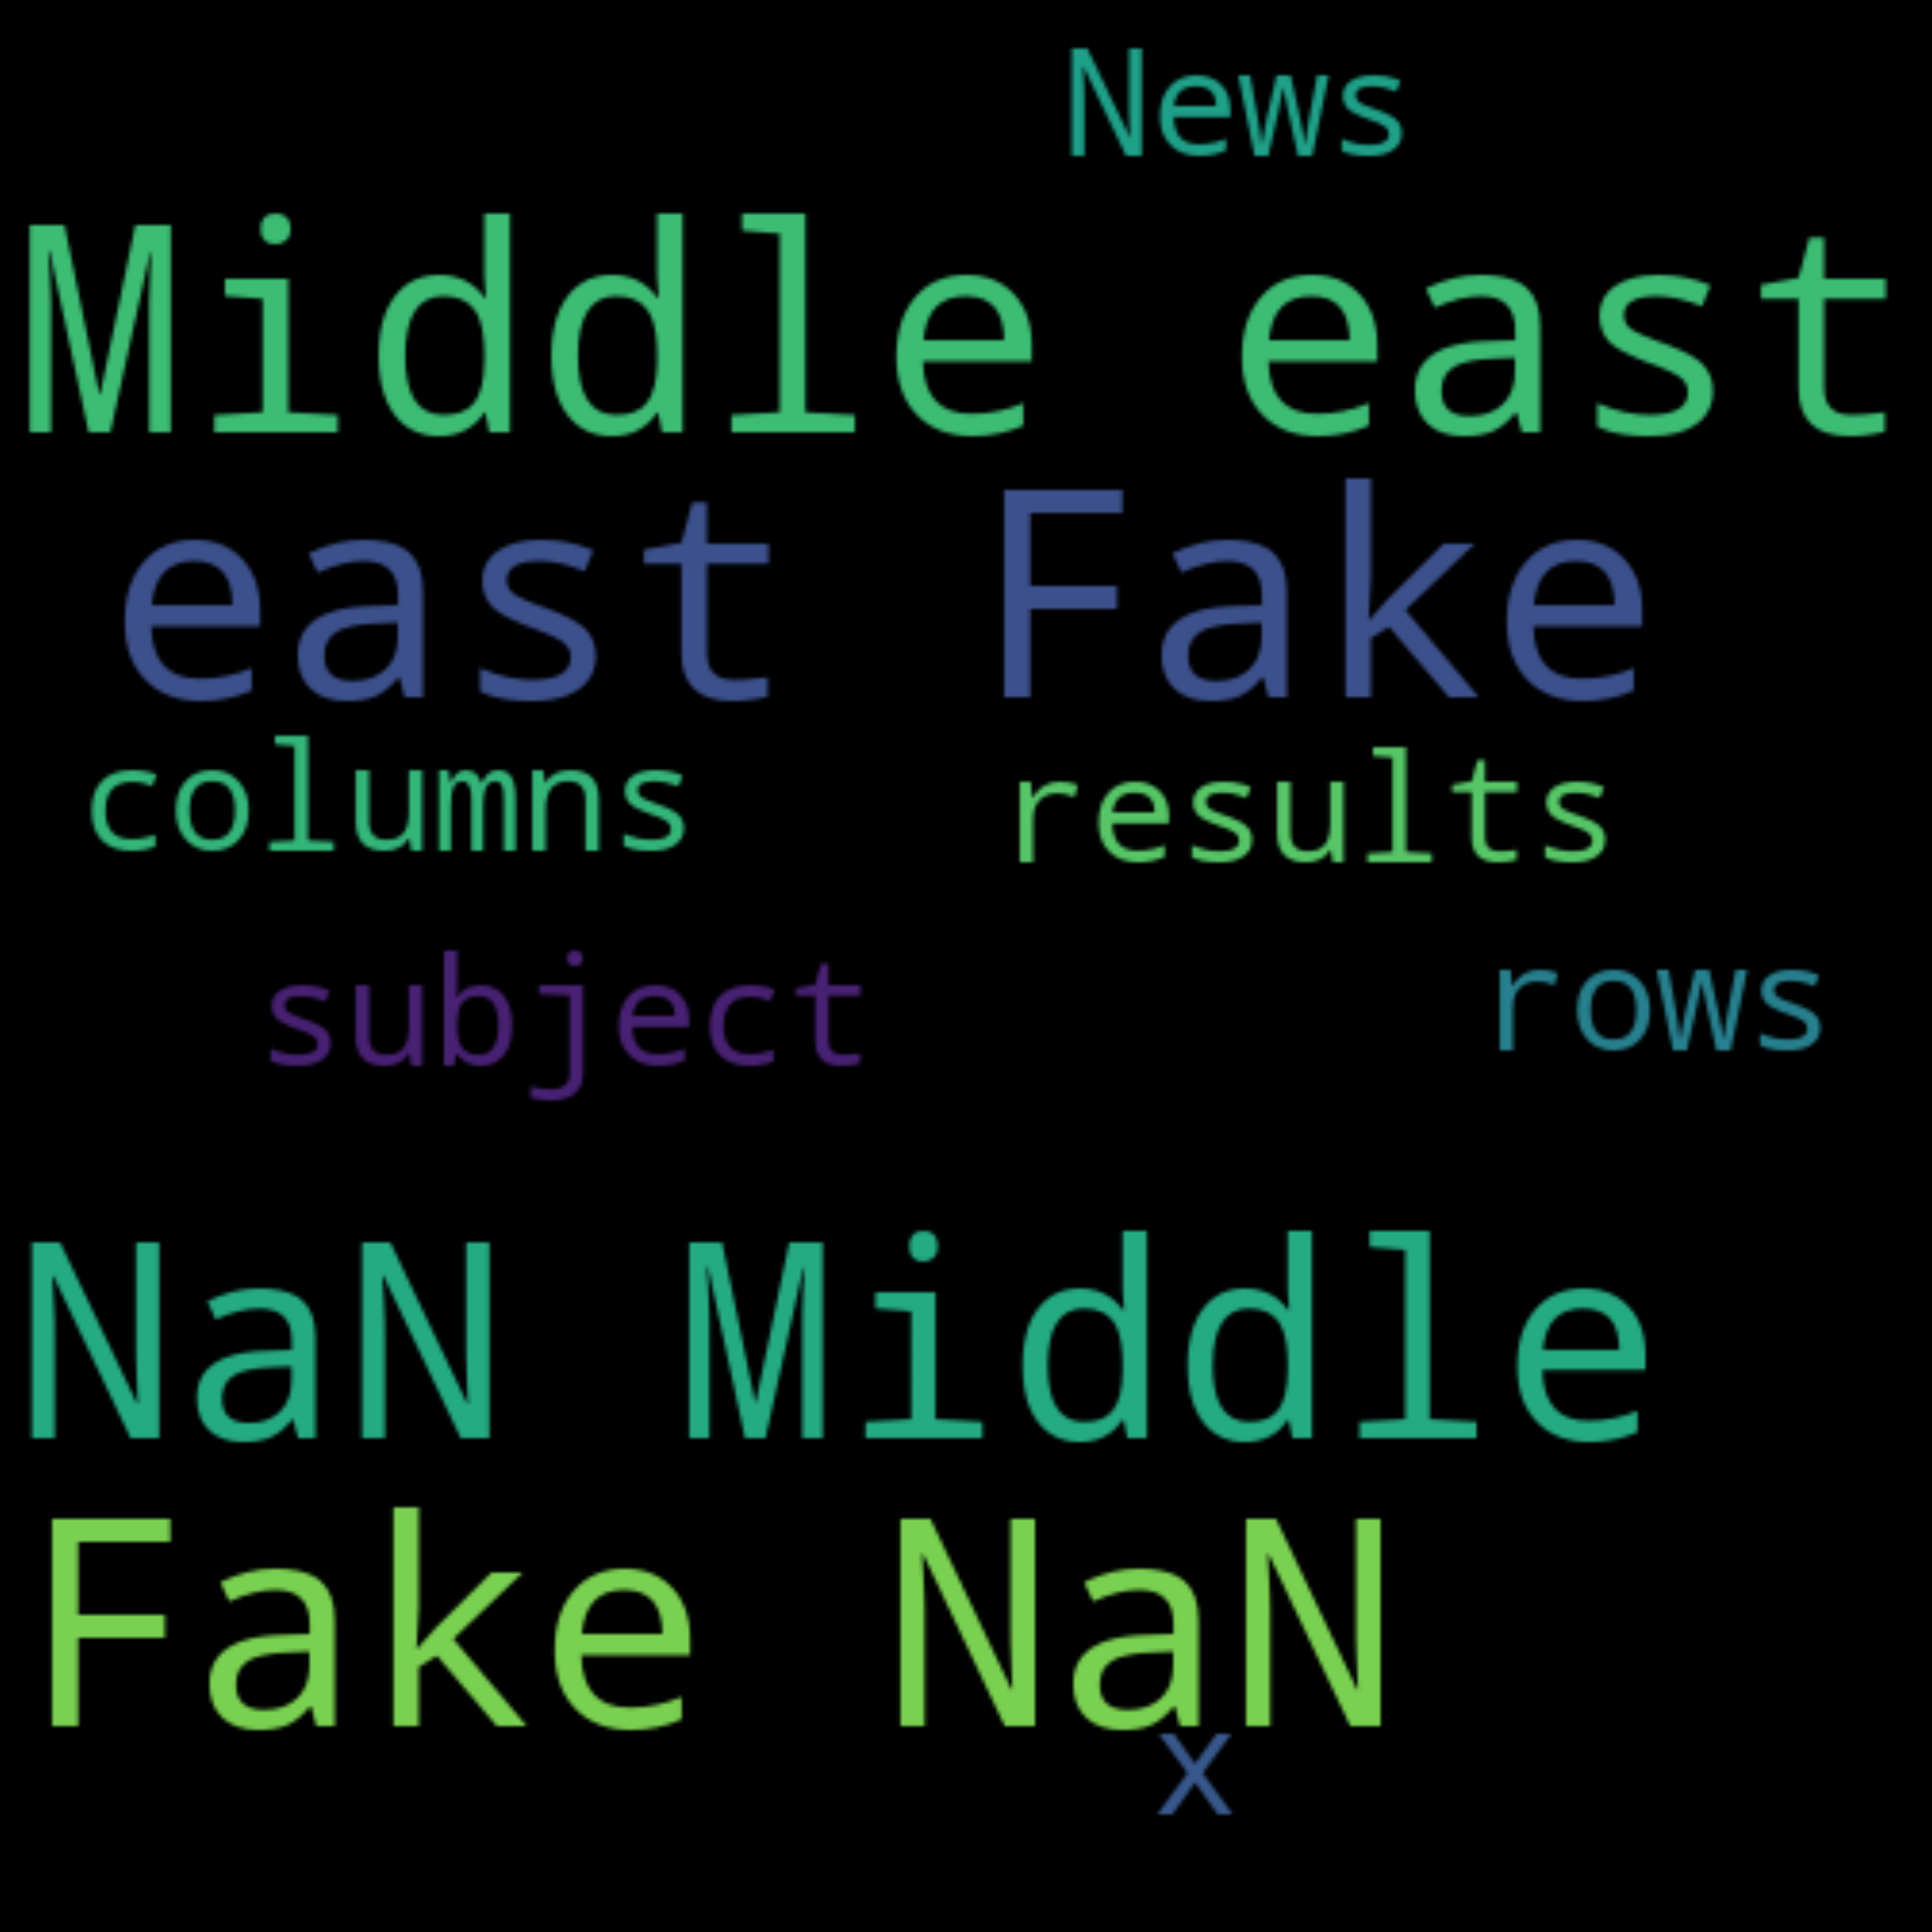

In [28]:
word_cloud(middle_east)

In [ ]:
true_data['title'] = true_data['title'].str.split('\t',n=3)
true_data['text'] = true_data['text'].str.split('\t',n=3)
fake_data['title'] = fake_data['title'].str.split('\t',n=3)
fake_data['text'] = fake_data['text'].str.split('\t',n=3)

In [23]:
string = 'hello my name is'
string.split()

['hello', 'my', 'name', 'is']